**Import the required libraries and:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**Read the source file:**

In [2]:
df = pd.read_csv("evdataset.csv")
df

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1116,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,390,290,340,560,370,450,2.8,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,1533,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,440,320,380,660,415,515,7.9,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,1547,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,210,140,170,295,170,220,11.7,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,1492,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,395,290,340,580,370,460,6.2,...,49,500,4588,1865,1614,2764,2715,575,535,5


**Checking if there are any missing data:**

In [3]:
df.isnull().sum().sum()

0

In [4]:
df.isna().sum().sum()

0

In [5]:
# No null values 

**Check the basic info of the data, columns names and number, rows, and duplicates**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [7]:
df.columns # Column names

Index(['id', 'Make', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats'],
      dtype='object')

In [8]:
len(df.columns) # total number of columns

27

In [9]:
len(df.index) # number of rows

194

In [10]:
print(df.duplicated().sum()) # check for duplicates.. no duplicated data

0


**Check how many different makes do we have in the dataset**

In [11]:
df["Make"].value_counts()

Mercedes      24
Porsche       18
Audi          16
Volkswagen    13
Peugeot       12
Citroen       11
Toyota         8
BMW            8
MG             8
Fiat           8
Ford           7
Kia            6
Opel           6
Hyundai        5
Renault        5
Skoda          5
Tesla          4
Genesis        4
Volvo          4
CUPRA          4
Polestar       2
Honda          2
Smart          2
Hongqi         2
DS             1
JAC            1
Nissan         1
Lexus          1
Dacia          1
Mazda          1
Seres          1
Jaguar         1
Mini           1
Subaru         1
Name: Make, dtype: int64

In [12]:
df["Make"].nunique()  # total number 

34

**Group the data by the make**

In [13]:
df= df.groupby("Make").mean().reset_index()
df


C:\Users\rania\AppData\Local\Temp\ipykernel_3204\3765107291.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df= df.groupby("Make").mean().reset_index()


,Make,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,Audi,1477.437500,357.812500,260.312500,307.812500,518.125000,330.000000,410.000000,6.412500,190.937500,...,42.937500,561.875000,4755.750000,1908.250000,1594.500000,2842.500000,2856.562500,601.562500,551.000000,4.875000
1,BMW,1527.250000,426.875000,316.875000,370.000000,624.375000,405.625000,498.750000,5.150000,208.125000,...,48.250000,606.250000,4881.250000,1911.375000,1601.375000,2935.375000,2901.250000,581.375000,492.500000,5.000000
2,CUPRA,1432.250000,345.000000,252.500000,297.500000,523.750000,327.500000,408.750000,7.450000,160.000000,...,51.250000,477.500000,4322.000000,1809.000000,1540.000000,2766.000000,2265.000000,517.750000,385.000000,4.750000
3,Citroen,1494.181818,234.545455,155.454545,190.909091,330.909091,192.727273,247.272727,12.245455,132.727273,...,26.181818,302.727273,4961.090909,1909.272727,1848.909091,3148.181818,2828.181818,923.090909,675.727273,8.090909
4,DS,1582.000000,260.000000,180.000000,220.000000,390.000000,230.000000,295.000000,8.700000,150.000000,...,36.000000,420.000000,4118.000000,1802.000000,1534.000000,2558.000000,1975.000000,452.000000,350.000000,5.000000
5,Dacia,1705.000000,160.000000,110.000000,130.000000,245.000000,140.000000,180.000000,19.100000,125.000000,...,35.000000,170.000000,3734.000000,1622.000000,1516.000000,2423.000000,1300.000000,363.000000,300.000000,4.000000
6,Fiat,1513.125000,220.625000,150.625000,182.500000,322.500000,190.000000,243.750000,10.850000,138.125000,...,41.625000,316.250000,4381.000000,1801.500000,1709.500000,2798.500000,2334.375000,698.125000,405.000000,6.000000
7,Ford,1719.000000,415.000000,295.000000,351.428571,599.285714,372.857143,466.428571,5.800000,185.714286,...,45.428571,380.000000,4721.571429,1881.000000,1620.857143,2984.000000,2659.142857,512.428571,322.000000,5.000000
8,Genesis,1667.250000,372.500000,265.000000,317.500000,542.500000,337.500000,422.500000,5.375000,213.750000,...,46.750000,955.000000,4565.000000,1895.000000,1592.500000,2893.750000,2652.500000,596.250000,449.750000,5.000000
9,Honda,1202.000000,165.000000,120.000000,140.000000,255.000000,155.000000,195.000000,8.650000,145.000000,...,33.000000,180.000000,3894.000000,1752.000000,1512.000000,2538.000000,1862.500000,346.000000,171.000000,4.000000


In [14]:
df.shape

(34, 25)

**Descriptive Analysis**


<div class="alert alert-block alert-info"><div class="alert alert-block alert-info">
 Using the describe function to get the summary of the dataset for tips and notes.</div>

In [15]:
summary = df.describe()
summary

,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,1519.556784,313.973135,223.990069,266.231886,461.994983,285.686715,358.539480,8.118401,168.758710,314.312583,...,43.961106,438.060826,4532.742432,1851.586597,1601.815799,2803.921028,2416.208754,553.275997,448.977556,5.254088
std,131.681627,82.746765,64.080988,73.710614,120.583571,82.846873,99.464252,3.041924,30.514314,87.004108,...,15.614480,212.131210,343.533511,76.822996,102.768369,195.917626,402.014674,137.968626,133.249665,1.051069
min,1202.000000,160.000000,110.000000,130.000000,245.000000,140.000000,180.000000,4.022222,125.000000,155.000000,...,25.375000,150.000000,3734.000000,1622.000000,1393.722222,2423.000000,1300.000000,346.000000,171.000000,4.000000
25%,1434.868056,239.166667,165.416667,200.833333,351.458333,209.375000,268.125000,6.062500,145.500000,235.416667,...,32.250000,305.795455,4382.000000,1803.750000,1540.000000,2663.062500,2134.468750,478.000000,371.500000,5.000000
50%,1528.225000,342.083333,240.000000,286.875000,502.500000,306.875000,386.250000,7.475000,160.000000,339.375000,...,44.500000,397.500000,4540.551282,1856.583333,1591.750000,2793.134615,2487.125000,514.000000,429.000000,5.000000
75%,1581.760417,375.125000,272.500000,323.125000,551.875000,343.125000,428.125000,9.500000,188.803571,377.812500,...,49.150000,540.000000,4747.437500,1894.687500,1637.211538,2926.753472,2673.750000,587.343750,541.968750,5.000000
max,1746.500000,442.083333,330.833333,385.000000,651.250000,424.375000,520.625000,19.100000,245.555556,456.041667,...,110.000000,1023.888889,5209.000000,2011.000000,1848.909091,3168.750000,3155.000000,923.090909,707.500000,8.090909


**Correlation Analysis**

<div class="alert alert-block alert-info"><div class="alert alert-block alert-info">
<p>Assumptions:</p>
<p>1. From the requirements, the Most important factor is the mileage.. therefore, We will use the Combind - mild weather for the mileage</p>
<p>2. Cold weather is not required as this is based on -10 celsuis which is not quite common in the UK weather.</p>
<p>3. From the above 2 points we can then eleminate all the following columns and only use the combined - mild weather:</p>
   <p> * City - Cold Weather</p>
  <p>  * Highway - Cold Weather</p>
   <p> * Combined - Cold Weather </p>
   <p> * City - Mild Weather</p>
  <p>  * Highway - Mild Weather</p>
       
<p>4. Total Torque is also droped</p>
</p>
<p>Perform correlation analysis to find out the relationship between each variable and the combined mild weather( which repersents the Mileage) to find out which of these variables mostly affecting the Mileage for the cars</div>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

variables = df.columns.drop(['id', 'Make', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather','Highway - Mild Weather','Total Torque'])

# Subset the data for the variables of interest
correlation_matrix = df[variables].corr()

print(correlation_matrix['Combined - Mild Weather'].sort_values(ascending = False))

Combined - Mild Weather        1.000000
Electric Range                 0.999447
Battery Capacity               0.889804
Top Speed                      0.798086
Total Power                    0.757569
Fastcharge Speed               0.734428
Gross Vehicle Weight (GVWR)    0.561874
Width                          0.507690
Length                         0.505074
Charge Power                   0.410274
Wheelbase                      0.382814
Charge Speed                   0.325572
Cargo Volume                   0.314539
Max. Payload                  -0.014526
Height                        -0.191648
Seats                         -0.213110
Acceleration 0 - 100 km/h     -0.735191
Name: Combined - Mild Weather, dtype: float64


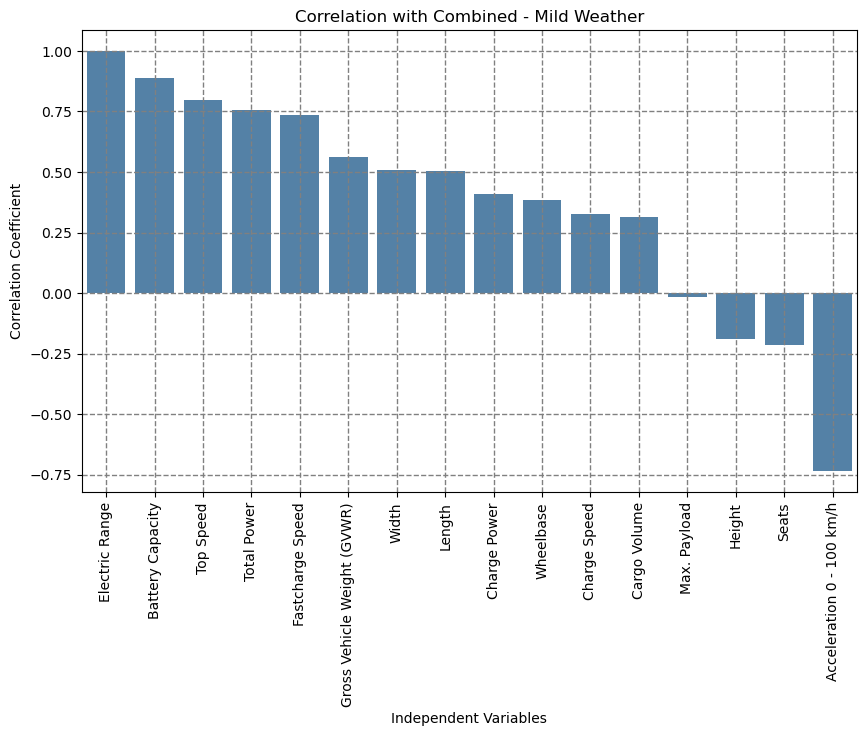

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dependent_variable = 'Combined - Mild Weather'
independent_variables = df.columns.drop([dependent_variable, 'id', 'Make', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather','Highway - Mild Weather','Total Torque'])

# Calculate the correlation coefficients
correlation_values = df[independent_variables].corrwith(df[dependent_variable])

# Sort the correlation values in descending order
correlation_values_sorted = correlation_values.sort_values(ascending=False)

# Plot the sorted correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_values_sorted.index, y=correlation_values_sorted.values, color='steelblue')

# Set labels and title
plt.xlabel('Independent Variables')
plt.ylabel('Correlation Coefficient')
plt.title(f'Correlation with {dependent_variable}')
plt.grid(color="grey", linewidth=1, linestyle="--")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


<div class="alert alert-block alert-info"><div class="alert alert-block alert-info">
    <p>From the above we can conclude that the most relevant values that affect the mileage are the following:</p>
<p>* Electric Range                 0.999447</p>
<p>* Battery Capacity               0.889804</p>
<p>* Top Speed                      0.798086</p>
<p>* Total Power                    0.757569</p>
<p>* Fastcharge Speed               0.734428</p>
<p>* Acceleration 0 - 100 km/h     -0.735191</p>
<p></p>
<p>We can now plot those variables</div>

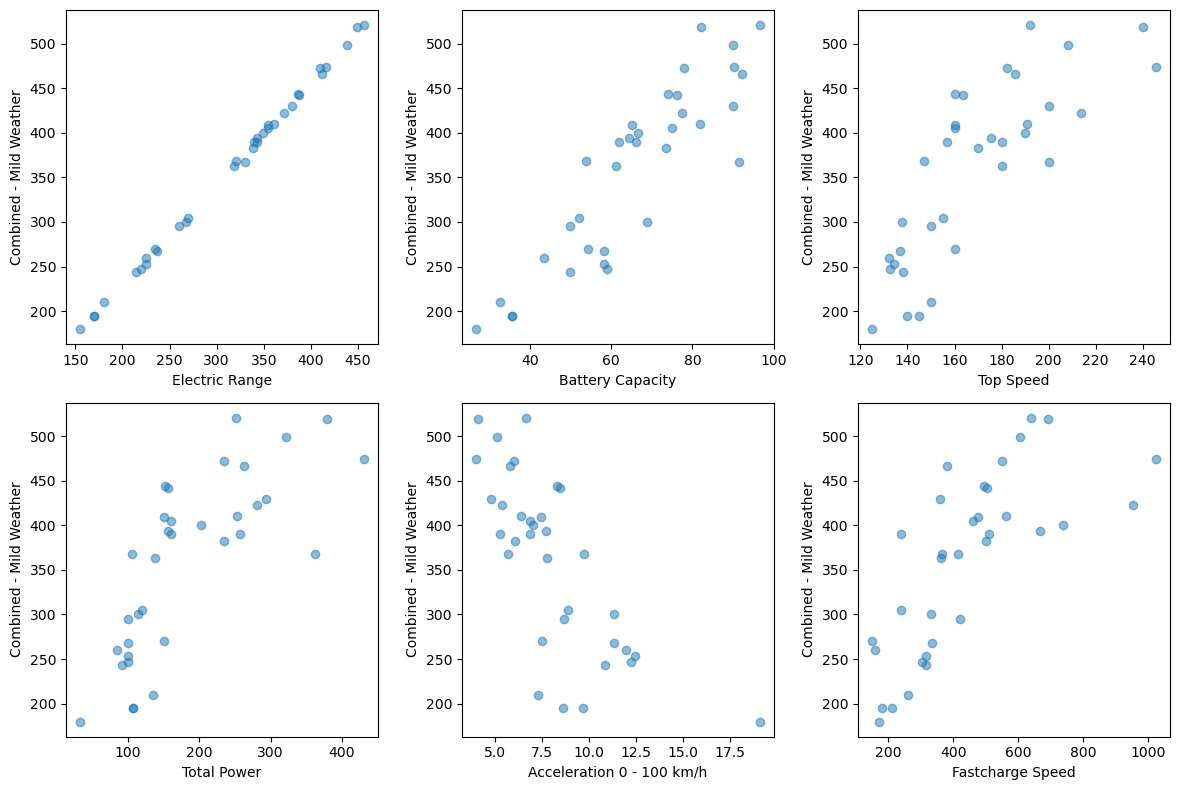

In [18]:
# Plot the scatter plots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

for i, variable in enumerate(["Electric Range", "Battery Capacity", "Top Speed","Total Power", 
                              "Acceleration 0 - 100 km/h", "Fastcharge Speed"]):
    axs[i].scatter(df[variable], df['Combined - Mild Weather'], alpha=0.5)
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Combined - Mild Weather')

# Adjust the layout    
plt.tight_layout()

# Show the plot
plt.show()

**We can also show the heatmap that displays the correlation between the variables**

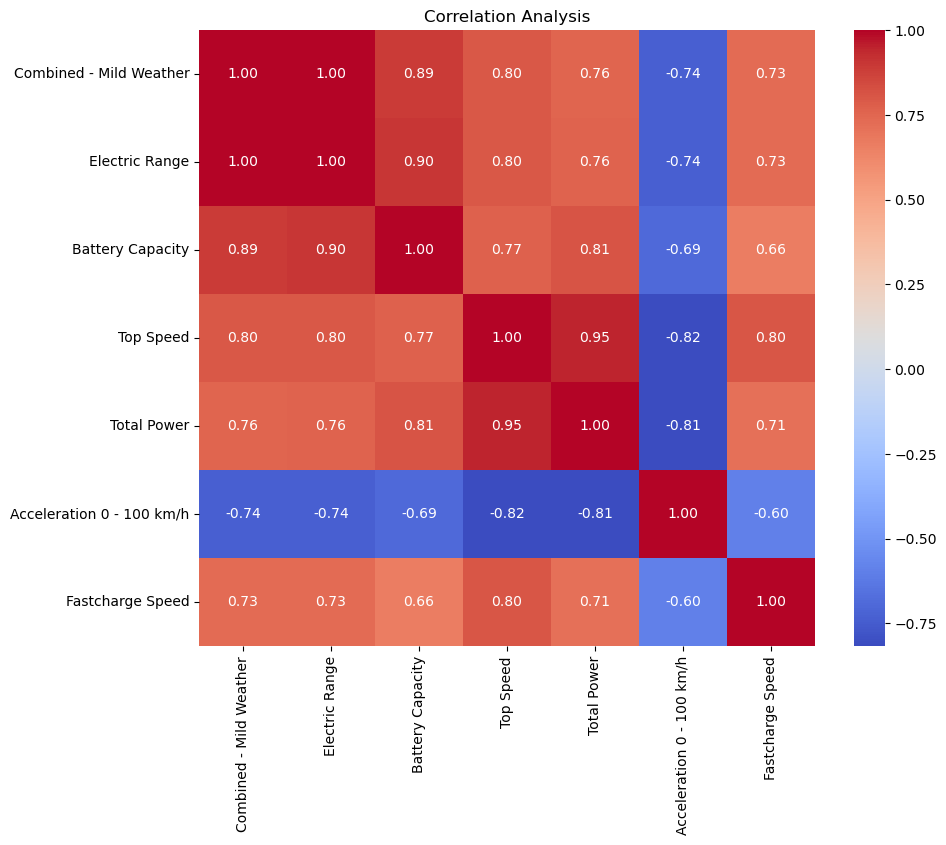

In [19]:
import seaborn as sns

variables = ['Combined - Mild Weather','Electric Range', 'Battery Capacity', 'Top Speed', 'Total Power',
             'Acceleration 0 - 100 km/h', 'Fastcharge Speed']

# Create a correlation matrix
correlation_matrix = df[variables].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set the title of the plot
plt.title('Correlation Analysis')

# Display the plot
plt.show()

**Finally, we can find out which car makes that are best to buy based on the above variables using the Grouped Bar Chart**

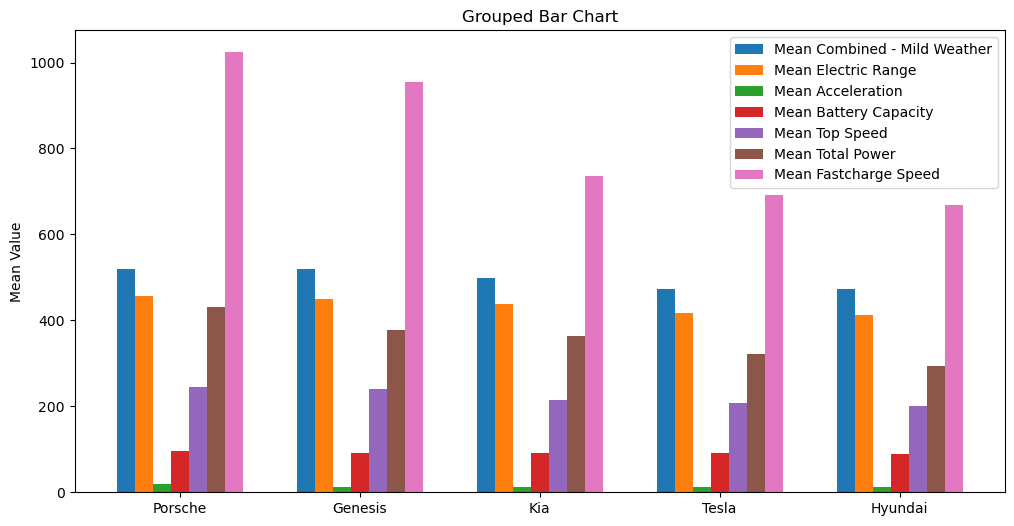

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the variables and their corresponding titles
variables = ['Combined - Mild Weather', 'Electric Range', 'Acceleration 0 - 100 km/h', 'Battery Capacity', 'Top Speed', 
             'Total Power', 'Fastcharge Speed']
titles = ['Mean Combined - Mild Weather', 'Mean Electric Range', 'Mean Acceleration', 'Mean Battery Capacity', 
          'Mean Top Speed', 'Mean Total Power', 'Mean Fastcharge Speed']

# Grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of each bar
bar_width = 0.1

# Set the positions of the bars on the x-axis
positions = np.arange(5)

# Plot each variable as a grouped bar
for i, variable in enumerate(variables):
    values = df.groupby('Make')[variable].mean().nlargest(5).sort_values(ascending=False)
    ax.bar(positions + (bar_width * i), values, bar_width, label=titles[i])

# Set the x-axis labels and ticks
ax.set_xticks(positions + (bar_width * (len(variables) - 1)) / 2)
ax.set_xticklabels(df.groupby('Make')[variable].mean().nlargest(5).sort_values(ascending=False).index)

# Set the y-axis label and title
ax.set_ylabel('Mean Value')
ax.set_title('Grouped Bar Chart')

# Add a legend
ax.legend()

# Display the plot
plt.show()


### Summary

**The steps that are taken to conclude the result are as follow:**

1. Some data cleaning processes are made to check for null values, duplicates or any other issues. The data was clean and has no issues.

2. Assumptions are made as follows:
    * The main factor to consider is the mileage which is displayed in the data in the weather columns.
    * We only need to consider the combined - mild weather for the mileage, because it gives an average mileages for the cars on the city and high way. The cold wather doesn't need to be considered because it's based on the -10 Celsius and it's not quite common in the UK.
    * Other irrelevant columns have been dropped such as Link.
3. Data is being grouped by the make column.

4. To find out which variables are most relevant to the mileage, the correlation analysis between the combined mild weather and other variables is done. 

5. The result of the correlation analysis showed that the most relevant variables that could affect the car mileage are as follows:
    * Electric Range
    * Battery Capacity
    * Top Speed
    * Total Power
    * Fastcharge Speed
    * Acceleration 
6. The final step was to combine all the revelevant variables to compare the different makes and find out which are the top recommended. 
7. As we can see from the above Chart, the the best car makes that are recommended to be bought, considering the mileage and the factors that are affecting it, are as follow:**

    * **Porsche**
    * **Gensis**
    * **Kia**
    * **Tesla**
    * **Huyndai**